In [ ]:
import numpy as np

# random 함수로 0~255 사이의 임의의 정수를 성분으로 갖는 4x4 행렬을 만든다.

a = np.random.randint(0, 255, (4, 4))
a

array([[164, 230,  62,  11],
       [243, 163, 253,   1],
       [132, 211, 150, 206],
       [178, 159, 147, 111]])

In [ ]:
# flatten을 사용해 1차원 행렬 (벡터)로 만든다.
b = a.flatten()
b

array([164, 230,  62,  11, 243, 163, 253,   1, 132, 211, 150, 206, 178,
       159, 147, 111])

In [ ]:
# reshape을 사용해 행렬 크기를 바꾼다. -1은 자동으로 계산한다는 의미이고 이 경우 16을 적는 것과 같다. 만약 (2, 8)의 행렬로 바꾸려 한다면 reshape(2, -1) 또는 reshape(2, 8) 둘다 같은 결과이다.
# c = a.reshape(-1)
c = a.reshape(2,8)
c

array([[164, 230,  62,  11, 243, 163, 253,   1],
       [132, 211, 150, 206, 178, 159, 147, 111]])

In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. 데이터셋 불러오기
from tensorflow.keras.datasets.mnist import load_data
(train_x, train_y), (test_x, test_y) = load_data()

# 2-1. 데이터 확인하기
train_x.shape, train_y.shape

test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

np.uint8(5)

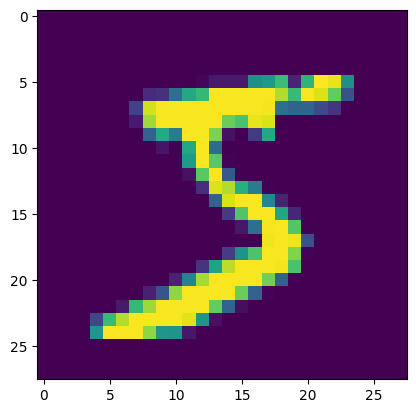

In [ ]:
# 2-2. 이미지 확인하기
from PIL import Image
img = train_x[0]

import matplotlib.pyplot as plt
img1 = Image.fromarray(img,mode ='L')
plt.imshow(img1)

train_y[0] # 첫번째 데이터 확인

In [ ]:
# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 3차원 -> 2차원 (데이터를 2차원 형태로 변환: 입력 데이터가 선형 모델에서는 벡터 형태)
train_x1 = train_x.reshape(60000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값의 크기 조절 : 0~1 사이 값으로 반환
train_x2 = train_x1 /255
test_x2 = test_x1 /255

In [ ]:
# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(10, activation='softmax', input_shape=(28*28,)))
md.summary() # 모델 요약

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. 모델 학습 진행
# 5-1. 모델 compile : 손실 함수, 최적화 함수, 측정 함수 설정
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 모델 학습 : 학습 횟수, batch_size 검증용 데이터 설정
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.6117 - loss: 1.4636 - val_acc: 0.8594 - val_loss: 0.6568
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8508 - loss: 0.6418 - val_acc: 0.8784 - val_loss: 0.5085
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8655 - loss: 0.5317 - val_acc: 0.8874 - val_loss: 0.4500
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8768 - loss: 0.4752 - val_acc: 0.8917 - val_loss: 0.4182
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.8811 - loss: 0.4432 - val_acc: 0.8958 - val_loss: 0.3964
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.8888 - loss: 0.4190 - val_acc: 0.8988 - val_loss: 0.3816
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.8897 - loss: 0.4069 - val_acc: 0.9000 - val_loss: 0.3701
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8935 - loss: 0.3939 - val_acc: 0.9017 - val_loss: 0.3613
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

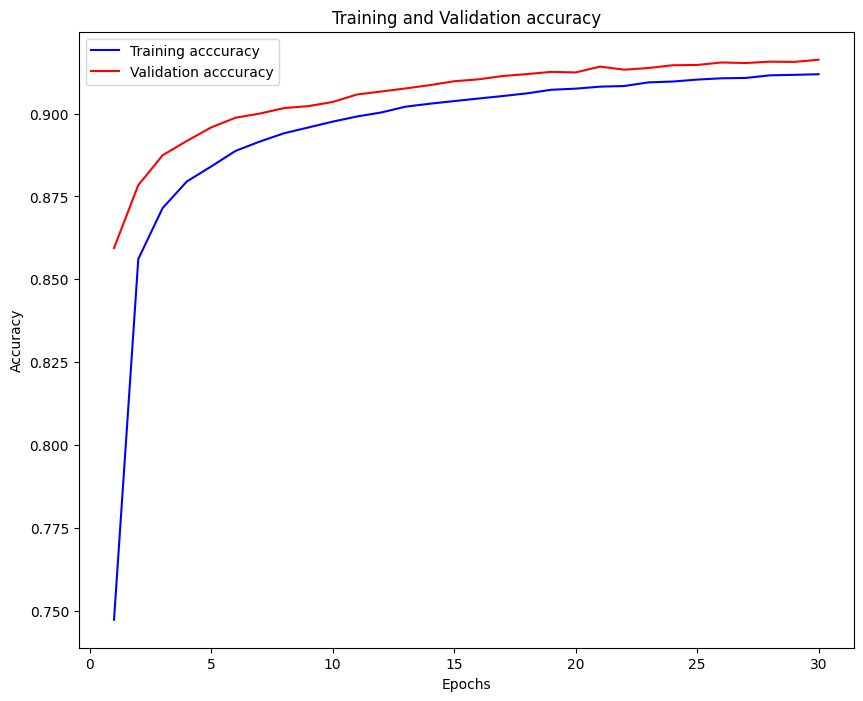

In [ ]:
acc=hist.history['acc']
val_acc=hist.history['val_acc']
epoch=np.arange(1, len(acc)+1)

# 학습결과 분석 : 학습 곡선 그리기
plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training acccuracy')
plt.plot(epoch, val_acc, 'r', label='Validation acccuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Final Training Accuracy: 0.4188
Final Validation Accuracy: 0.3877
Final Training Loss: 1.6862
Final Validation Loss: 1.7750


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.6118 - loss: 1.4705 - val_acc: 0.8597 - val_loss: 0.6527
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8508 - loss: 0.6406 - val_acc: 0.8777 - val_loss: 0.5068
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8693 - loss: 0.5276 - val_acc: 0.8869 - val_loss: 0.4496
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8810 - loss: 0.4614 - val_acc: 0.8909 - val_loss: 0.4179
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8818 - loss: 0.4445 - val_acc: 0.8957 - val_loss: 0.3966
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8866 - loss: 0.4218 - val_acc: 0.8987 - val_loss: 0.3820
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8918 - loss: 0.4012 - val_acc: 0.9014 - val_loss: 0.3707
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.8918 - loss: 0.3913 - val_acc: 0.9035 - val_loss: 0.3615
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - ac

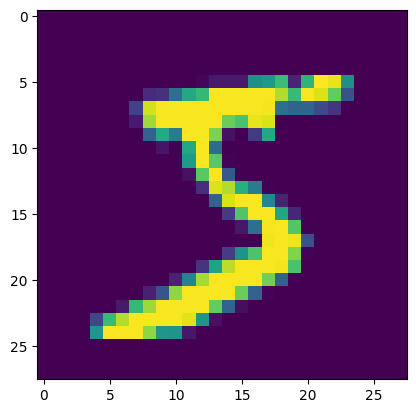

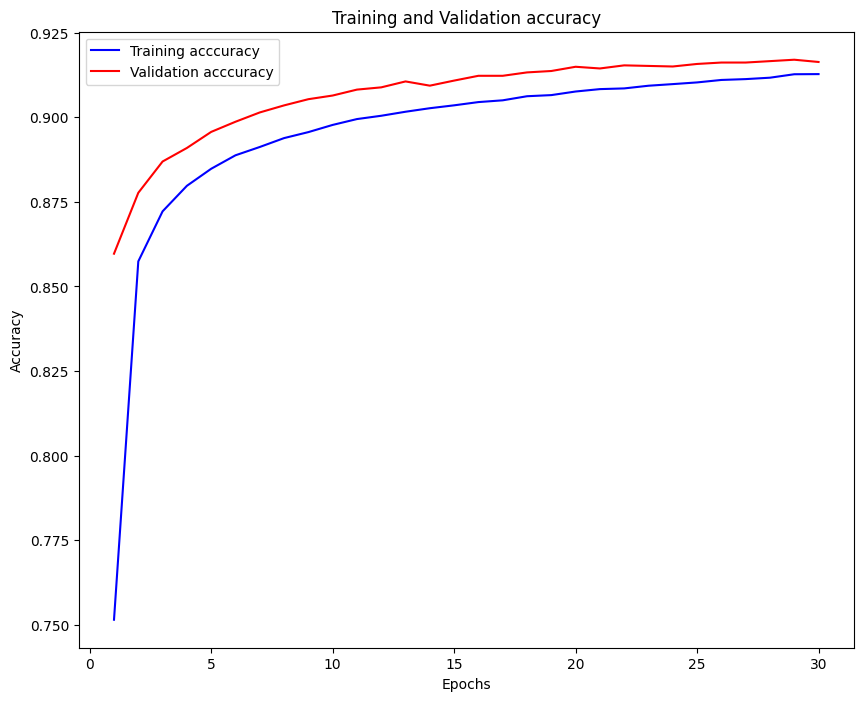

Final Training Accuracy: 0.9128
Final Validation Accuracy: 0.9163
Final Training Loss: 0.3139
Final Validation Loss: 0.3018


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. 데이터셋 불러오기
from tensorflow.keras.datasets.mnist import load_data
(train_x, train_y), (test_x, test_y) = load_data()

# 2-1. 데이터 확인하기
train_x.shape, train_y.shape

test_x.shape, test_y.shape

# 2-2. 이미지 확인하기
from PIL import Image
img = train_x[0]

import matplotlib.pyplot as plt
img1 = Image.fromarray(img,mode ='L')
plt.imshow(img1)

train_y[0] # 첫번째 데이터 확인

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 3차원 -> 2차원 (데이터를 2차원 형태로 변환: 입력 데이터가 선형 모델에서는 벡터 형태)
train_x1 = train_x.reshape(60000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값의 크기 조절 : 0~1 사이 값으로 반환
train_x2 = train_x1 /255
test_x2 = test_x1 /255

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(10, activation='softmax', input_shape=(28*28,)))
md.summary() # 모델 요약

# 5. 모델 학습 진행
# 5-1. 모델 compile : 손실 함수, 최적화 함수, 측정 함수 설정
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 모델 학습 : 학습 횟수, batch_size 검증용 데이터 설정
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

acc=hist.history['acc']
val_acc=hist.history['val_acc']
epoch=np.arange(1, len(acc)+1)

# 학습결과 분석 : 학습 곡선 그리기
plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training acccuracy')
plt.plot(epoch, val_acc, 'r', label='Validation acccuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


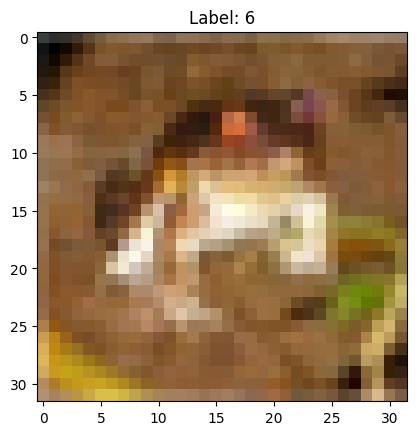

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 10)             │        30,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.2714 - loss: 2.0538 - val_acc: 0.3164 - val_loss: 1.9139
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.3533 - loss: 1.8499 - val_acc: 0.3674 - val_loss: 1.8132
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.3696 - loss: 1.8053 - val_acc: 0.3597 - val_loss: 1.8284
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.3744 - loss: 1.7918 - val_acc: 0.3469 - val_loss: 1.8789
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.3770 - loss: 1.7978 - val_acc: 0.3593 - val_loss: 1.8293
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.3859 - loss: 1.7694 - val_acc: 0.3524 - val_loss: 1.8736
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.3901 - loss: 1.7740 - val_acc: 0.3800 - val_loss: 1.7970
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.3948 - loss: 1.7477 - val_acc: 0.3678 - val_loss: 1.8193
Epoch 9/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/

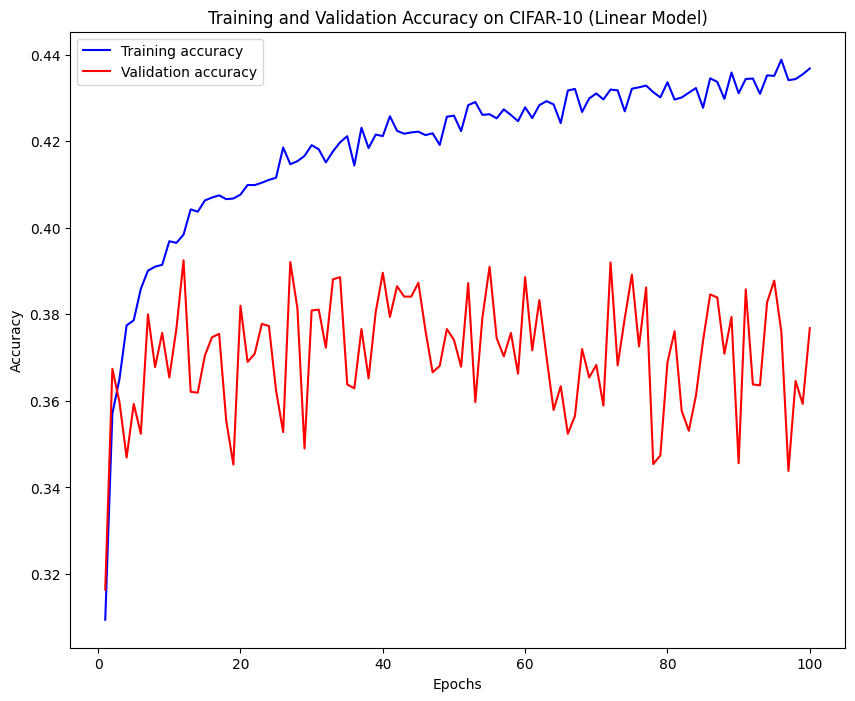

Final Training Accuracy: 0.4368
Final Validation Accuracy: 0.3768
Final Training Loss: 1.6524
Final Validation Loss: 1.8537


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. CIFAR-10 데이터셋 불러오기
from tensorflow.keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# 2-1. 데이터 확인하기
print("Train:", train_x.shape, train_y.shape)
print("Test :", test_x.shape, test_y.shape)

# 2-2. 이미지 확인하기
import matplotlib.pyplot as plt
from PIL import Image

img = train_x[0]
img1 = Image.fromarray(img)
plt.imshow(img1)
plt.title(f"Label: {train_y[0][0]}")
plt.show()

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 4차원 -> 2차원 (32*32*3 = 3072)
train_x1 = train_x.reshape(50000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값 정규화 (0~1)
train_x2 = train_x1 / 255.0
test_x2 = test_x1 / 255.0

# 4. 모델 설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4-1. 선형 모델 구성 (입력: 3072, 출력: 10)
md = Sequential()
md.add(Dense(10, activation='softmax', input_shape=(32*32*3,)))
md.summary()

# 5. 모델 학습
# 5-1. 모델 컴파일
from tensorflow.keras.optimizers import Adam
adam_optimizer = Adam(learning_rate=0.001)
md.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
#md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 학습 수행
hist = md.fit(train_x2, train_y, epochs=100, batch_size=64, validation_split=0.2)

# 6. 학습 결과 시각화
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epoch = np.arange(1, len(acc)+1)

plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy on CIFAR-10 (Linear Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")